In [64]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 데이터 로드
data = pd.read_csv('/Users/junho/Hadoop-Classification/Word-Count/result/word_count_result.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111194 entries, 0 to 111193
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      85288 non-null   float64
 1   title_pos               111123 non-null  object 
 2   content_pos             111185 non-null  object 
 3   hash_tag                48386 non-null   object 
 4   include_ad_keyword_num  111194 non-null  int64  
 5   is_ad_name              111194 non-null  bool   
 6   include_ad_keyword_str  39390 non-null   object 
 7   include_ad_keyword      25906 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 6.0+ MB


/var/folders/d4/h0qr0sg95p75rz677_d7q4gr0000gn/T/ipykernel_51050/3395300739.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/junho/Hadoop-Classification/Word-Count/result/word_count_result.csv')


In [65]:
# 한글 폰트 경로 설정
font_path = "/Users/junho/Library/Fonts/Pretendard-Black.ttf"
font_prop = fm.FontProperties(fname=font_path)

In [66]:
# is_ad_review 정의
data['is_ad_review'] = (data['is_ad_name'] == True) | (data['include_ad_keyword_num'] > 1)

# is_ad_review 분포 확인
ad_review_count = data['is_ad_review'].sum()
total_count = len(data)
print(f"Ad Review count: {ad_review_count}, Total count: {total_count}")


Ad Review count: 30437, Total count: 111194


/var/folders/d4/h0qr0sg95p75rz677_d7q4gr0000gn/T/ipykernel_51050/2929307172.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, fontproperties=font_prop)


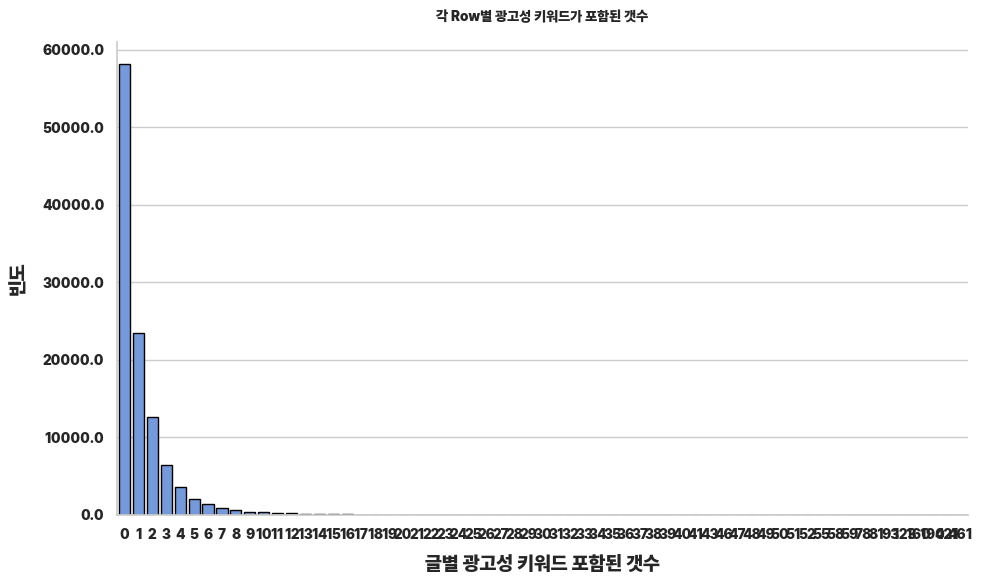

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 관련 변수(font_prop)가 이미 정의되어 있다고 가정
distribution = data['include_ad_keyword_num'].value_counts().sort_index()

# distribution 시리즈를 DataFrame으로 변환
dist_df = distribution.reset_index()
dist_df.columns = ['num_keywords', 'frequency']

# seaborn 테마 설정
sns.set_theme(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# seaborn barplot을 사용하여 데이터 시각화
ax = sns.barplot(
    x='num_keywords', 
    y='frequency', 
    data=dist_df, 
    color='cornflowerblue', 
    edgecolor='black'
)

# 제목 및 라벨 설정
ax.set_title("각 Row별 광고성 키워드가 포함된 갯수", fontsize=20, fontweight='bold', pad=15, fontproperties=font_prop)
ax.set_xlabel("글별 광고성 키워드 포함된 갯수", fontsize=14, labelpad=10, fontproperties=font_prop)
ax.set_ylabel("빈도", fontsize=14, labelpad=10, fontproperties=font_prop)

# x축, y축 틱 라벨 스타일 설정
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12, fontproperties=font_prop)
ax.set_yticklabels(ax.get_yticks(), fontsize=12, fontproperties=font_prop)

# 불필요한 보더 제거
sns.despine()

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


/var/folders/d4/h0qr0sg95p75rz677_d7q4gr0000gn/T/ipykernel_51050/142304801.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, fontproperties=font_prop)


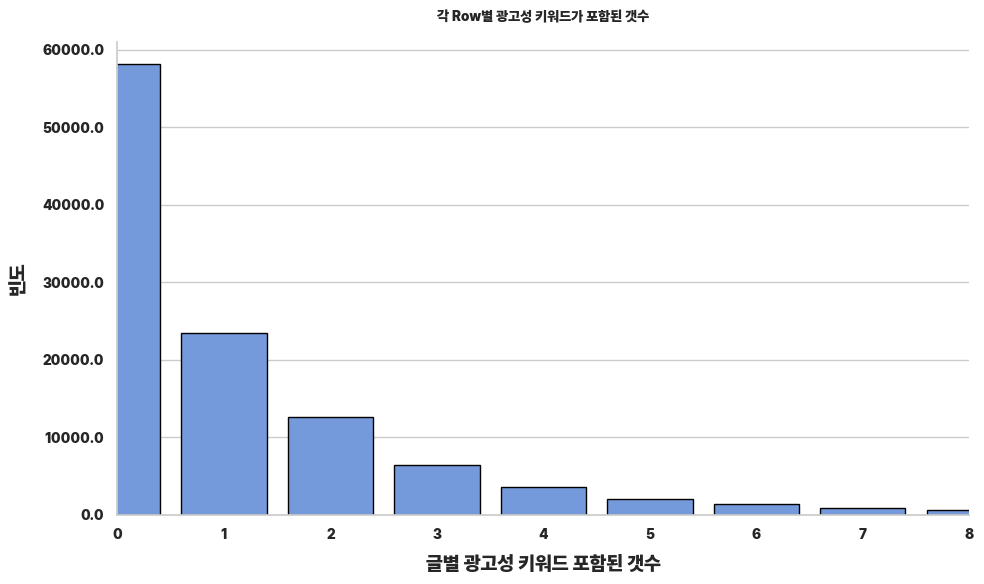

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 관련 변수(font_prop)가 이미 정의되어 있다고 가정
distribution = data['include_ad_keyword_num'].value_counts().sort_index()

# distribution 시리즈를 DataFrame으로 변환
dist_df = distribution.reset_index()
dist_df.columns = ['num_keywords', 'frequency']

# seaborn 테마 설정
sns.set_theme(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# seaborn barplot을 사용하여 데이터 시각화
ax = sns.barplot(
    x='num_keywords', 
    y='frequency', 
    data=dist_df, 
    color='cornflowerblue', 
    edgecolor='black'
)

# x축 범위 설정 (예: x축을 0부터 5까지로 제한)
ax.set_xlim(0, 8)

# 제목 및 라벨 설정
ax.set_title("각 Row별 광고성 키워드가 포함된 갯수", fontsize=20, fontweight='bold', pad=15, fontproperties=font_prop)
ax.set_xlabel("글별 광고성 키워드 포함된 갯수", fontsize=14, labelpad=10, fontproperties=font_prop)
ax.set_ylabel("빈도", fontsize=14, labelpad=10, fontproperties=font_prop)

# x축, y축 틱 라벨 스타일 설정
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12, fontproperties=font_prop)
ax.set_yticklabels(ax.get_yticks(), fontsize=12, fontproperties=font_prop)

# 불필요한 보더 제거
sns.despine()

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


/var/folders/d4/h0qr0sg95p75rz677_d7q4gr0000gn/T/ipykernel_51050/1670271431.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, fontproperties=font_prop)


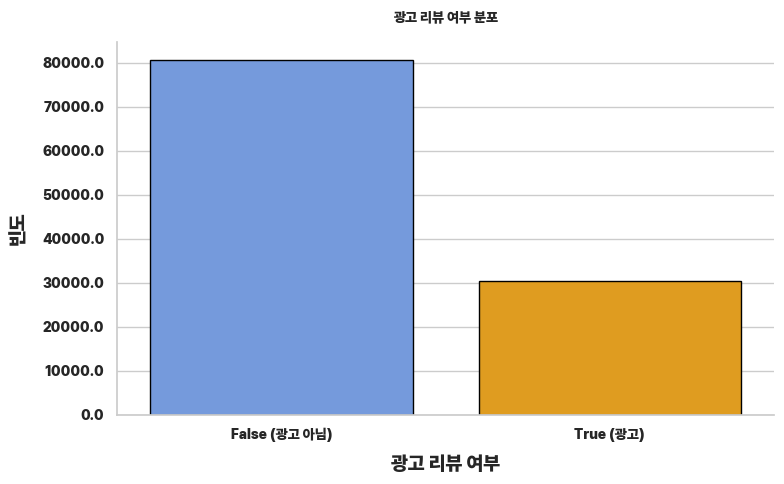

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# seaborn 테마 설정
sns.set_theme(style="whitegrid")

# 광고 리뷰 여부 분포 계산 (막대 그래프)
distribution_ad_review = data['is_ad_review'].value_counts().sort_index()
dist_df = distribution_ad_review.reset_index()
dist_df.columns = ['is_ad_review', 'frequency']

plt.figure(figsize=(8, 5))
# seaborn barplot 이용
ax = sns.barplot(x='is_ad_review', y='frequency', data=dist_df, palette=['cornflowerblue', 'orange'], edgecolor='black')

# 제목 및 라벨 설정 (한국어 적용)
ax.set_title("광고 리뷰 여부 분포", fontsize=16, fontweight='bold', pad=15, fontproperties=font_prop)
ax.set_xlabel("광고 리뷰 여부", fontsize=14, labelpad=10, fontproperties=font_prop)
ax.set_ylabel("빈도", fontsize=14, labelpad=10, fontproperties=font_prop)

# x축 라벨 스타일 설정
ax.set_xticklabels(['False (광고 아님)', 'True (광고)'], rotation=0, fontsize=12, fontproperties=font_prop)
ax.set_yticklabels(ax.get_yticks(), fontsize=12, fontproperties=font_prop)

# 불필요한 보더 제거
sns.despine()

plt.tight_layout()
plt.show()

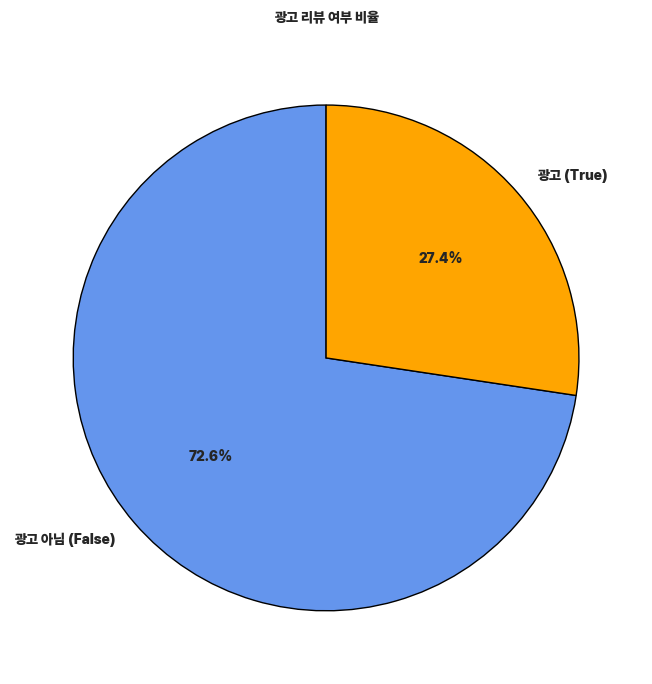

In [75]:

# 광고 리뷰 여부 비율 계산 (원형 그래프)
distribution_ad_review = data['is_ad_review'].value_counts()

# seaborn 테마 유지
plt.figure(figsize=(7, 7))

# 파이 차트는 seaborn에 내장된 기능은 없으나, set_theme으로 전반적인 스타일 개선 가능
# distribution_ad_review를 파이 차트로 시각화
plt.pie(
    distribution_ad_review, 
    labels=['광고 아님 (False)', '광고 (True)'],  
    autopct='%1.1f%%',  
    startangle=90,  
    colors=['cornflowerblue', 'orange'], 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  
    textprops={'fontsize': 12, 'fontproperties': font_prop}
)

# 제목 설정
plt.title("광고 리뷰 여부 비율", fontsize=16, fontweight='bold', fontproperties=font_prop, pad=15)

# y축 라벨 제거
plt.ylabel("")

plt.tight_layout()
plt.show()

findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.


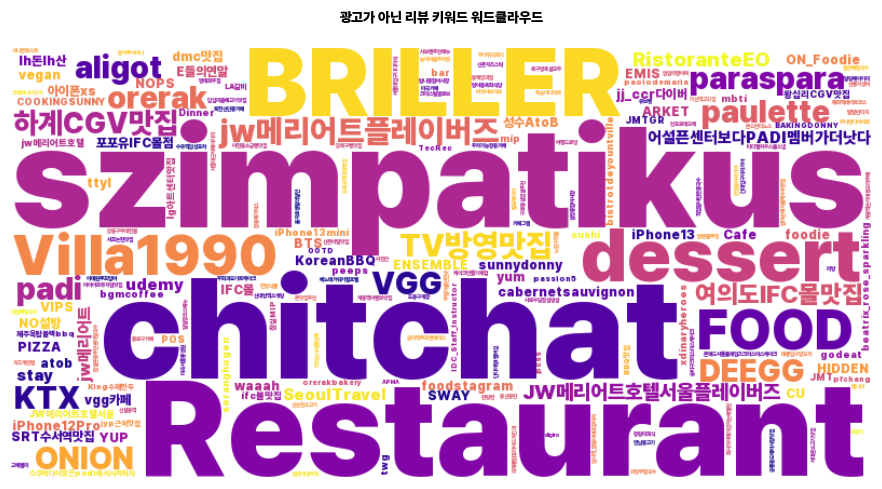

In [69]:
# 광고가 아닌 리뷰 키워드 워드클라우드
filtered_keywords_false = data[data['is_ad_review'] == False]['hash_tag'].dropna()

unique_keywords_false = set()
for keywords in filtered_keywords_false:
    unique_keywords_false.update(keywords.split())  # 공백으로 키워드 분리

all_keywords_false = " ".join(unique_keywords_false)

wordcloud_false = WordCloud(
    font_path=font_path,  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'
).generate(all_keywords_false)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_false, interpolation='bilinear')
plt.axis('off')
plt.title("광고가 아닌 리뷰 키워드 워드클라우드", fontsize=18, fontweight='bold', fontproperties=font_prop, pad=20)
plt.tight_layout()
plt.show()


findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.


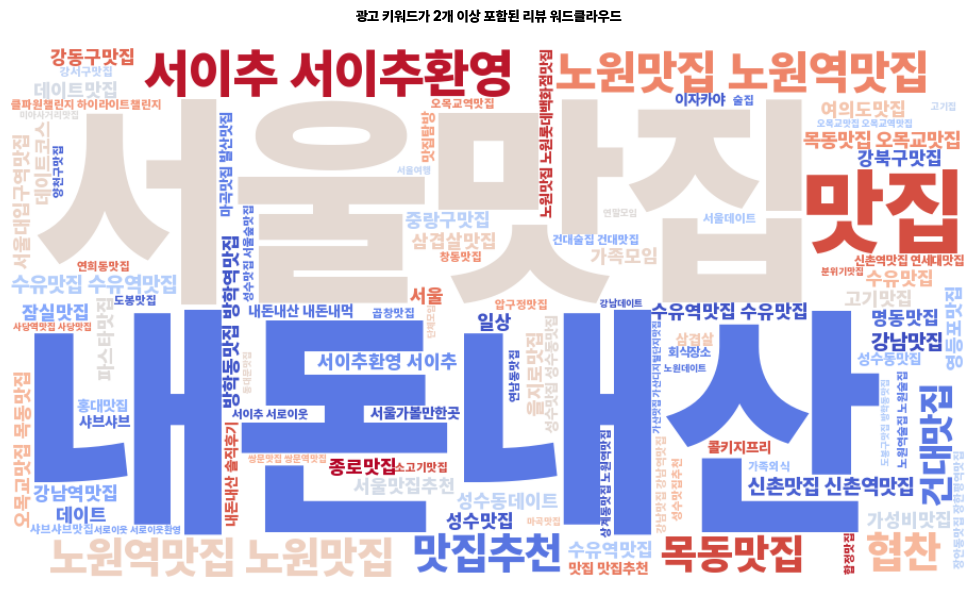

findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.


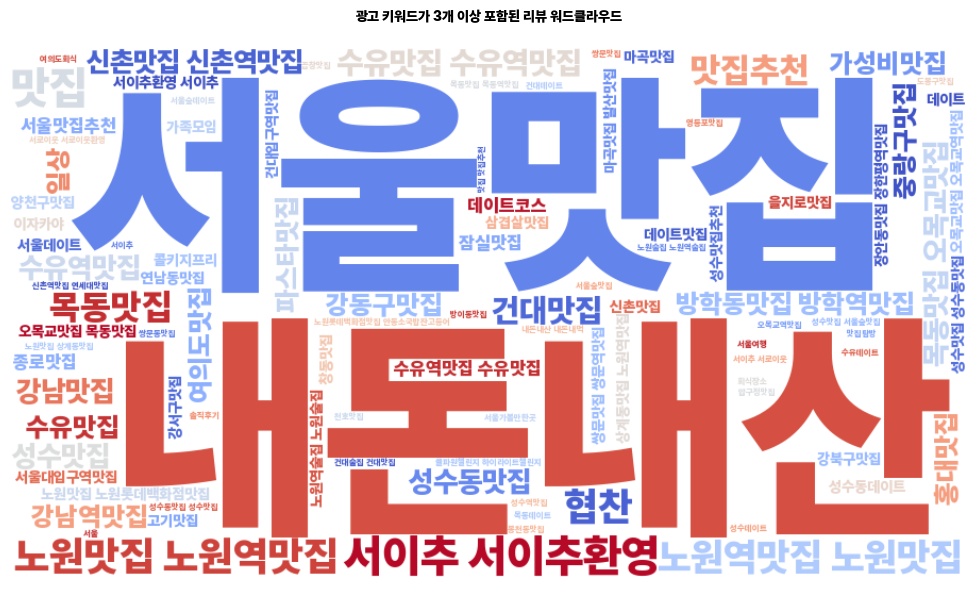

findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.


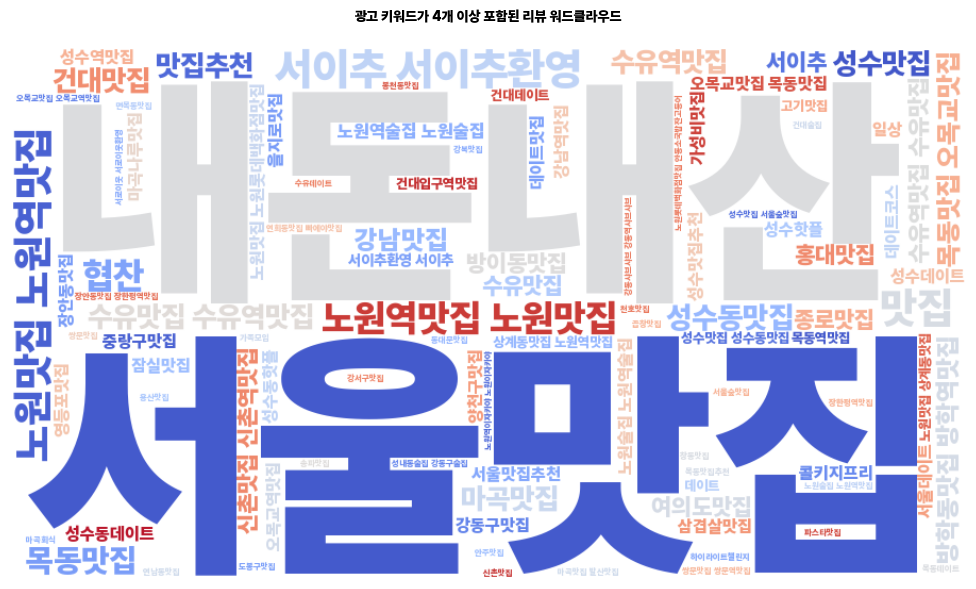

findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.


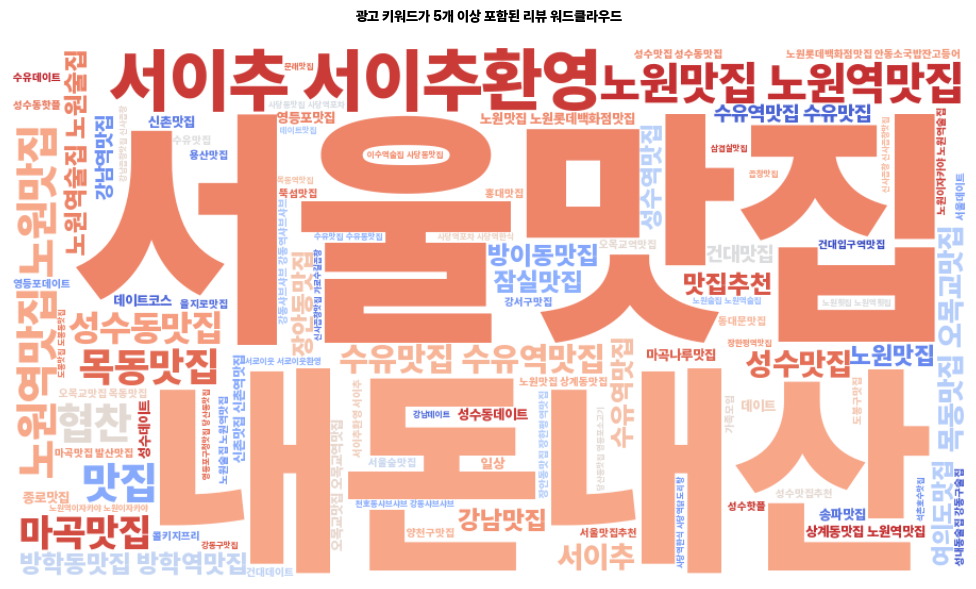

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 조건별 워드클라우드 생성 함수
def generate_wordcloud(condition, title):
    filtered_keywords = data[data['include_ad_keyword_num'] > condition]['hash_tag'].dropna()
    all_keywords = " ".join(filtered_keywords)
    
    wordcloud = WordCloud(
        font_path=font_path,  # 한글 폰트 경로
        width=900,
        height=500,
        background_color='white',
        colormap='coolwarm',
        max_words=100,
        contour_width=2,
        contour_color='steelblue'
    ).generate(all_keywords)
    
    # 워드클라우드 시각화
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 제거
    plt.title(title, fontsize=18, fontweight='bold', fontproperties=font_prop, pad=20)
    plt.tight_layout()
    plt.show()

# 조건별 워드클라우드 생성
conditions = [
    (1, "광고 키워드가 2개 이상 포함된 리뷰 워드클라우드"),
    (2, "광고 키워드가 3개 이상 포함된 리뷰 워드클라우드"),
    (3, "광고 키워드가 4개 이상 포함된 리뷰 워드클라우드"),
    (4, "광고 키워드가 5개 이상 포함된 리뷰 워드클라우드")
]

for condition, title in conditions:
    generate_wordcloud(condition, title)
